In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from RNN.models import EncoderDecoderGRU
from utils import profile_predict, plot_profile



In [2]:
curve_dir= {}
curve_dir[1] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/1/1_4_0_0.csv"
curve_dir[2] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/2/2_4_0_0.csv"
curve_dir[3] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/3/3_4_0_0.csv"
curve_dir[4] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/4/4_4_0_0.csv"
curve_dir[5] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/5/5_4_0_0.csv"
curve_dir[6] = "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/6/6_4_0_0.csv"

pretrained_weights = "/home/mazin/Projects/Thesis/RNN/checkpoints/polar-sky-201/SEFD-monitor_val-epoch=857-train_loss=0.0000321-val_loss=0.0001363-val_mae=0.01209.ckpt"
encoder_input_length = 20
decoder_input_length = 1980
current_min = -2.5
current_max = 1
voltage_min = 2.5
voltage_max = 4.2

In [3]:
rnn_model = EncoderDecoderGRU.load_from_checkpoint(pretrained_weights).to("cpu")

In [4]:
profile = 3
actual_current, actual_voltage, predicted_voltage = profile_predict(
    rnn_model, curve_dir[profile])
predicted_voltage
# plot_profile(actual_current, actual_voltage, predicted_voltage)

tensor([4.1210, 4.1343, 4.1305,  ..., 2.7539, 2.7491, 2.7438])

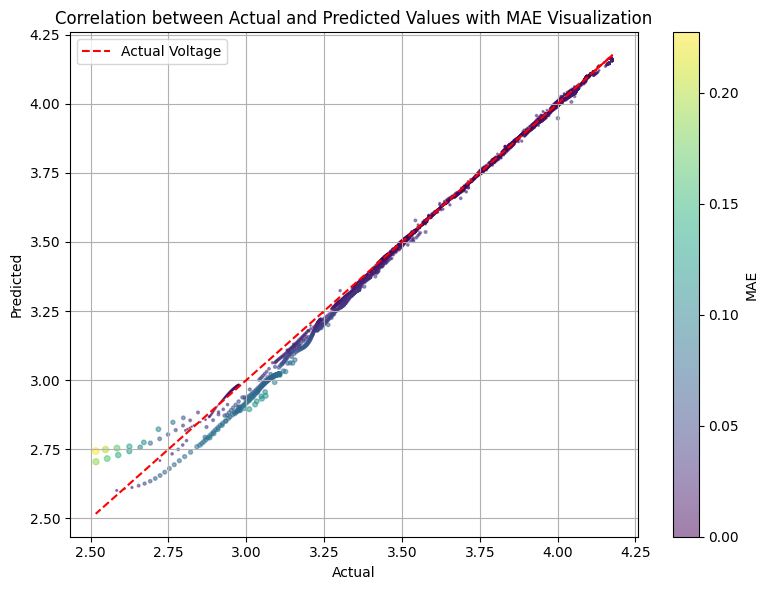

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_correlation_with_mae(actual, predicted):
    """
    Plot correlation between actual and predicted values with MAE visualization.
    
    Parameters:
        actual (array-like): Array of actual values.
        predicted (array-like): Array of predicted values.
    """
    # Convert input arrays to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate Mean Absolute Error (MAE)
    mae = np.abs(actual - predicted)
    
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    
    # Plot scatter plot with marker size proportional to MAE
    plt.scatter(actual, predicted, c=mae, cmap='viridis', alpha=0.5, s=mae*100)
    plt.plot(actual, actual, color='red', linestyle='--', label='Actual Voltage')
    
    # Add labels and title
    plt.title('Correlation between Actual and Predicted Values with MAE Visualization')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    # Add colorbar for MAE
    cbar = plt.colorbar()
    cbar.set_label('MAE')
    
    
    # Show legend
    plt.legend()
    
    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_correlation_with_mae(actual_voltage, predicted_voltage)


In [ ]:
""" Plot the error for """